# Config

In [49]:
# parameters
SAVE_OUTPUT = True
SIZE_PLOTS = (12,10)
BUFFER_SIZE = 402.336 
YEAR = 2024

#Location of the data
INPUT_DATA_PATH = "../data/raw/strava"
OUTPUT_DATA_PATH = "../data/interim/"
OUTPUT_FIGURES_PATH = "../reports/figures/"

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path


# Load data

In [ ]:
#Data from Strava
origins=pd.read_csv(Path(INPUT_DATA_PATH) / f"origins_{YEAR}.csv")
destinations=pd.read_csv(Path(INPUT_DATA_PATH) / f"destinations_{YEAR}.csv")
hexagons = gpd.read_file(Path(INPUT_DATA_PATH) / f"polygons_{YEAR}.shp")


In [ ]:
# Read municipalities
municipalities = gpd.read_file("../data/external/municipalitites/municipalitites.gpkg")

# Data management

## Explore data

In [5]:
#Explore origins
print(origins.shape)
print(origins.columns)
print(origins.dtypes)
origins.head()

(1701, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'commute_count', 'morning_commute_count', 'midday_commute_count',
       'evening_commute_count', 'overnight_commute_count',
       'weekday_commute_count', 'weekend_commute_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
commute_count               int64
morning_commute_count       int64
midday_commute_count        int64
evening_commute_count       int64
overnight_commute_count     int64
weekday_commute_count       int64
weekend_commute_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,commute_count,morning_commute_count,midday_commute_count,evening_commute_count,overnight_commute_count,weekday_commute_count,weekend_commute_count
0,8839440043fffff,2024,origins,"Ride,EBikeRide",20,10,5,0,0,15,5
1,88394404e3fffff,2024,origins,"Ride,EBikeRide",40,15,10,15,0,35,0
2,883944001dfffff,2024,origins,"Ride,EBikeRide",0,0,0,0,0,0,0
3,88394411d9fffff,2024,origins,"Ride,EBikeRide",15,0,15,0,0,0,15
4,88394404d5fffff,2024,origins,"Ride,EBikeRide",20,15,5,0,0,15,0


In [6]:
#Explore destinations
print(destinations.shape)
print(destinations.columns)
print(destinations.dtypes)
destinations.head()

(1708, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'commute_count', 'morning_commute_count', 'midday_commute_count',
       'evening_commute_count', 'overnight_commute_count',
       'weekday_commute_count', 'weekend_commute_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
commute_count               int64
morning_commute_count       int64
midday_commute_count        int64
evening_commute_count       int64
overnight_commute_count     int64
weekday_commute_count       int64
weekend_commute_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,commute_count,morning_commute_count,midday_commute_count,evening_commute_count,overnight_commute_count,weekday_commute_count,weekend_commute_count
0,8839440043fffff,2024,destinations,"Ride,EBikeRide",15,0,5,10,0,10,5
1,88394404e3fffff,2024,destinations,"Ride,EBikeRide",30,0,25,0,0,25,5
2,88394400e7fffff,2024,destinations,"Ride,EBikeRide",10,5,5,5,0,5,5
3,88394411d9fffff,2024,destinations,"Ride,EBikeRide",10,0,10,0,0,0,10
4,88394404d5fffff,2024,destinations,"Ride,EBikeRide",15,0,5,5,0,10,5


In [7]:
#Explore fines_per_infraction
print(hexagons.shape)
print(hexagons.columns)
print(hexagons.dtypes)
hexagons.head()

(11996, 2)
Index(['hex_id', 'geometry'], dtype='object')
hex_id        object
geometry    geometry
dtype: object


,hex_id,geometry
0,883944066dfffff,"POLYGON ((2.09298 41.86371, 2.09886 41.86557, ..."
1,88394450dbfffff,"POLYGON ((1.58345 41.59172, 1.58928 41.59360, ..."
2,883944a1c7fffff,"POLYGON ((2.31651 42.06080, 2.32243 42.06266, ..."
3,8839441645fffff,"POLYGON ((1.98377 41.99099, 1.98966 41.99286, ..."
4,88394420b3fffff,"POLYGON ((2.57972 41.70524, 2.58563 41.70708, ..."


## Join data


In [8]:
#Merge origins and destinations
df = origins.merge(destinations, how='left', on='hex_id', suffixes=('_origin', '_destination'))
gdf = hexagons.merge(df, how='left', on='hex_id')

print(gdf.shape)
print(gdf.columns)
print(gdf.dtypes)
gdf.head()

(11996, 22)
Index(['hex_id', 'geometry', 'date_origin', 'origins_or_destinations_origin',
       'activity_types_origin', 'commute_count_origin',
       'morning_commute_count_origin', 'midday_commute_count_origin',
       'evening_commute_count_origin', 'overnight_commute_count_origin',
       'weekday_commute_count_origin', 'weekend_commute_count_origin',
       'date_destination', 'origins_or_destinations_destination',
       'activity_types_destination', 'commute_count_destination',
       'morning_commute_count_destination', 'midday_commute_count_destination',
       'evening_commute_count_destination',
       'overnight_commute_count_destination',
       'weekday_commute_count_destination',
       'weekend_commute_count_destination'],
      dtype='object')
hex_id                                   object
geometry                               geometry
date_origin                             float64
origins_or_destinations_origin           object
activity_types_origin              

,hex_id,geometry,date_origin,origins_or_destinations_origin,activity_types_origin,commute_count_origin,morning_commute_count_origin,midday_commute_count_origin,evening_commute_count_origin,overnight_commute_count_origin,...,date_destination,origins_or_destinations_destination,activity_types_destination,commute_count_destination,morning_commute_count_destination,midday_commute_count_destination,evening_commute_count_destination,overnight_commute_count_destination,weekday_commute_count_destination,weekend_commute_count_destination
0,883944066dfffff,"POLYGON ((2.09298 41.86371, 2.09886 41.86557, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88394450dbfffff,"POLYGON ((1.58345 41.59172, 1.58928 41.59360, ...",2024.0,origins,"Ride,EBikeRide",15.0,0.0,0.0,15.0,0.0,...,2024.0,destinations,"Ride,EBikeRide",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,883944a1c7fffff,"POLYGON ((2.31651 42.06080, 2.32243 42.06266, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8839441645fffff,"POLYGON ((1.98377 41.99099, 1.98966 41.99286, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,88394420b3fffff,"POLYGON ((2.57972 41.70524, 2.58563 41.70708, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Spatial Operations

In [29]:
#Ensure CRS
print(gdf.crs)
print(municipalities.crs)

#Project to local 25831
gdf = gdf.to_crs(epsg=25831)
municipalities = municipalities.to_crs(epsg=25831)

EPSG:4326
EPSG:3857


In [30]:
#Filter the municipalities that are in the hexagons
print(municipalities.shape)
municipalities_Barcelona = municipalities[municipalities.geometry.within(gdf.unary_union)]
print(municipalities_Barcelona.shape)

(8205, 8)
(311, 8)


## Data imputation

In [15]:
#Fill NaN with 0 for the specific columns
columns = ['commute_count_origin', 'commute_count_destination']

for column in columns:
    gdf[column] = gdf[column].fillna(0)
    

## Data visualization

<Axes: title={'center': 'Strava Commutes Origin in 2024'}>

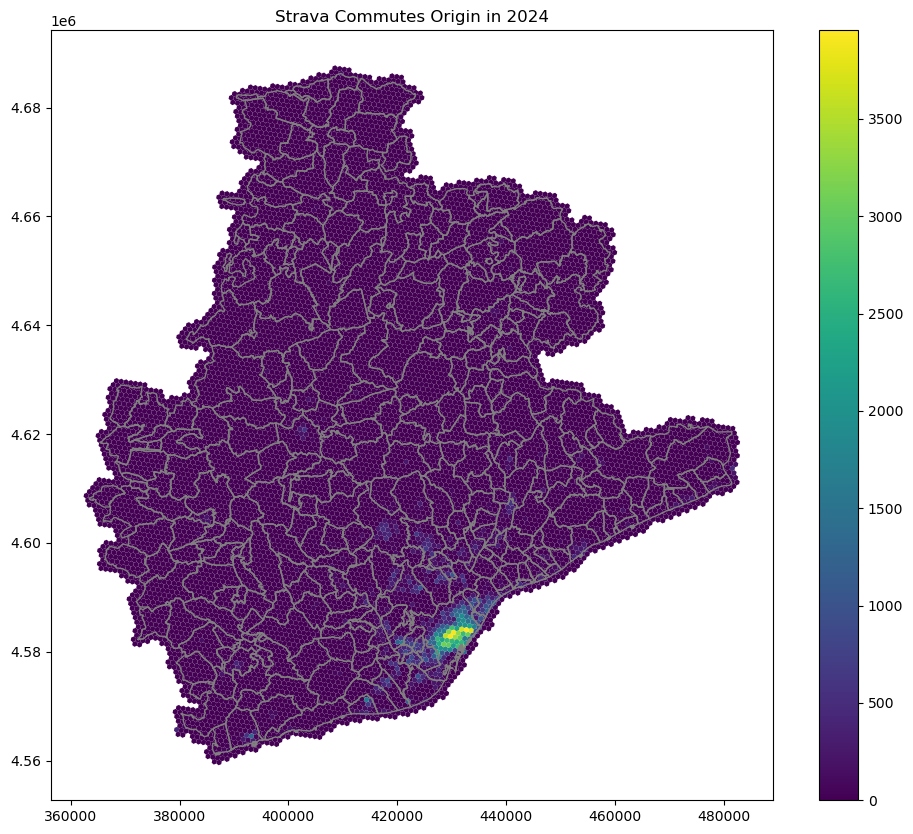

In [35]:
ax = gdf.plot(figsize=SIZE_PLOTS, column='commute_count_origin', legend=True, cmap='viridis', edgecolor=None)
ax.set_title('Strava Commutes Origin in 2024')
municipalities_Barcelona.plot(ax=ax, facecolor='none', edgecolor='grey')

<Axes: title={'center': 'Strava Commutes Destiantion in 2024'}>

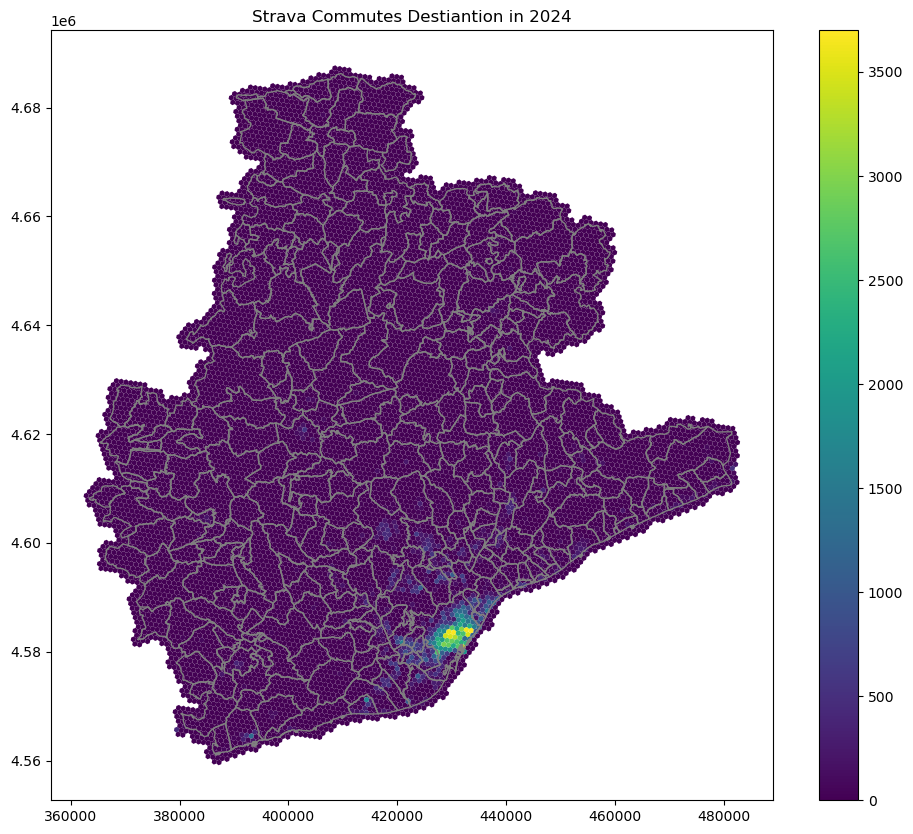

In [36]:
ax = gdf.plot(figsize=SIZE_PLOTS, column='commute_count_destination', legend=True, cmap='viridis', edgecolor=None)
ax.set_title('Strava Commutes Destiantion in 2024')
municipalities_Barcelona.plot(ax=ax, facecolor='none', edgecolor='grey')

# Focus on Barcelona

## Filter data

In [43]:
#Get polygon of Barcelona city
barcelona = municipalities_Barcelona[municipalities_Barcelona["NAMEUNIT"] == "Barcelona"]
print(barcelona.shape)

#Get the hexagons that are in Barcelona
gdf_Barcelona = gpd.overlay(gdf, barcelona, how='intersection')
print(gdf_Barcelona.shape)

(1, 8)
(185, 29)


## Visualize

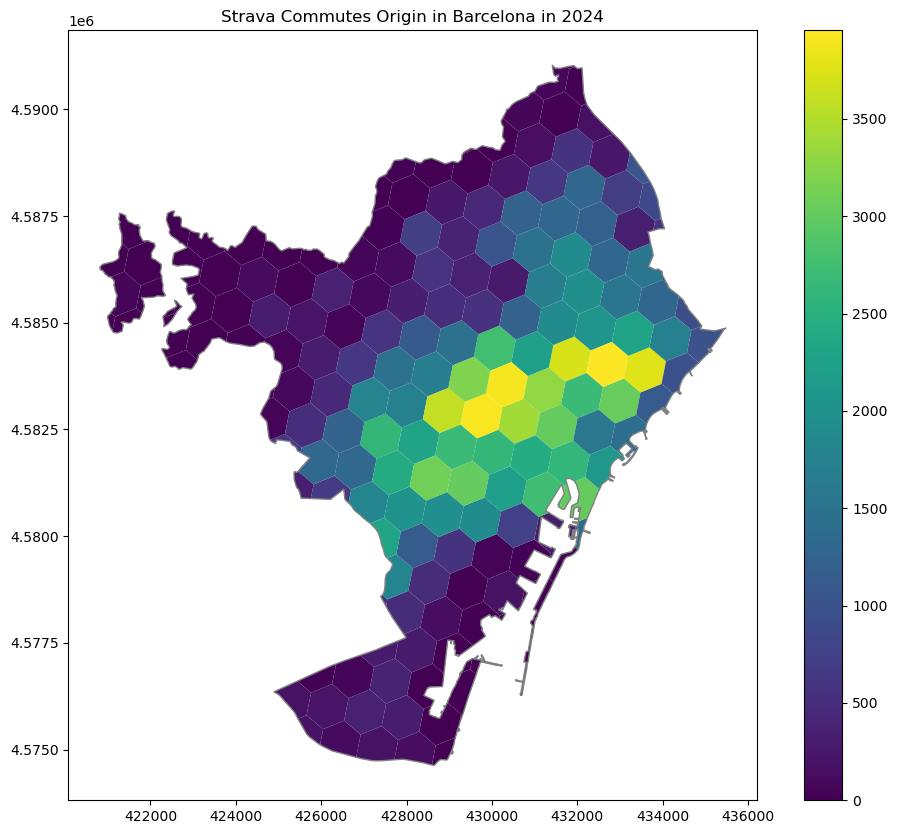

In [46]:
#Plot map of origins in Barcelona
ax = gdf_Barcelona.plot(figsize=SIZE_PLOTS, column='commute_count_origin', legend=True, cmap='viridis', edgecolor=None)
ax.set_title('Strava Commutes Origin in Barcelona in 2024')
barcelona.plot(ax=ax, facecolor='none', edgecolor='grey')

fig_strava_origin_barcelona_city = ax.get_figure()

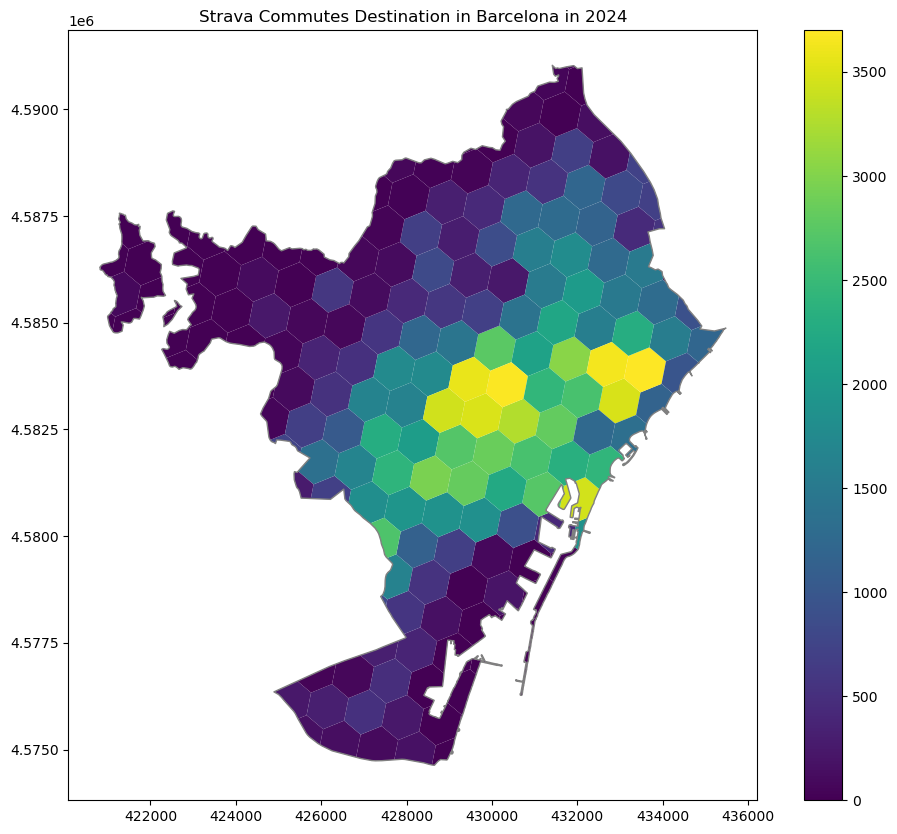

In [47]:
#Plot map of destination in Barcelona
ax = gdf_Barcelona.plot(figsize=SIZE_PLOTS, column='commute_count_destination', legend=True, cmap='viridis', edgecolor=None)
ax.set_title('Strava Commutes Destination in Barcelona in 2024')
barcelona.plot(ax=ax, facecolor='none', edgecolor='grey')

fig_strava_destination_barcelona_city = ax.get_figure()

## Save output

In [50]:
if SAVE_OUTPUT:
    #Save plots
    fig_strava_origin_barcelona_city.savefig(Path(OUTPUT_FIGURES_PATH) / 'strava_commutes_origin_barcelona_2024.png')
    fig_strava_destination_barcelona_city.savefig(Path(OUTPUT_FIGURES_PATH) / 'strava_commutes_destination_barcelona_2024.png')

## Watermark

In [ ]:
!python -m pip install watermark --quiet

In [ ]:
%load_ext watermark

In [ ]:
%watermark

Last updated: 2024-08-23T15:55:33.641180+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
%watermark --iversions

json  : 2.0.9
pandas: 2.1.4
google: 2.0.3
numpy : 1.26.4



In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
